In [1]:
from linares_plot import *
import os
import datetime
from datetime import datetime as dt
import re
import statsmodels.formula.api as smf

In [40]:
df = pd.read_excel('C:\\Users\\David\\Desktop\\David\\risa_aplausos\\df_subjects.xlsx')
df.head()

,duration,event,subject,tiempo,time_s,trick,RT,previous_event,anticip_time,next_event,r1,r2,r3,r4
0,1,Se,1,00:00:06,6,1,-1,None,-21,gag,0,0,0,0
1,1,Si,1,00:00:10,10,1,-1,None,-17,gag,0,0,0,0
2,102,N,1,00:00:12,12,1,-1,None,-15,gag,0,0,0,0
3,1,In,1,00:00:32,32,1,5,gag,-2,gag,0,0,0,0
4,1,In,1,00:01:02,62,1,16,inicio,-3,gag,0,0,0,0


In [41]:
df['event2']=df['event'].copy()
df['event2']=df['event2'].replace(['A', 'A+', 'a', 'aa', 'AA', 'AA+', 'a+'], ['A', 'A', 'A', 'A', 'A', 'A', 'A'])
df['event2']=df['event2'].replace(['I', 'D'], ['Ld', 'Ld'])

df['count']=1

In [47]:
### total count according to previous event

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Responses to mini climax')

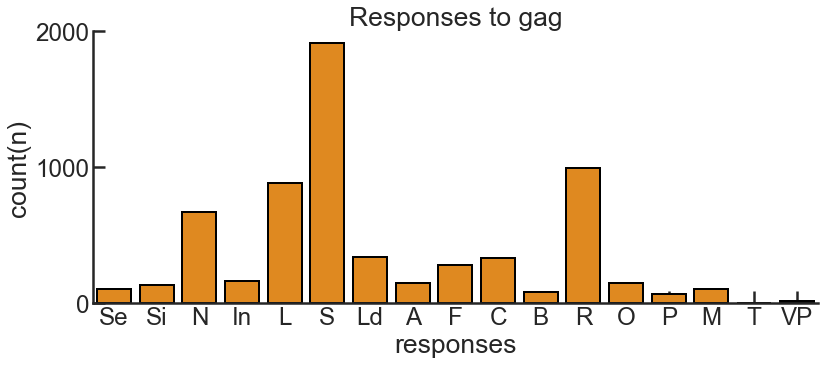

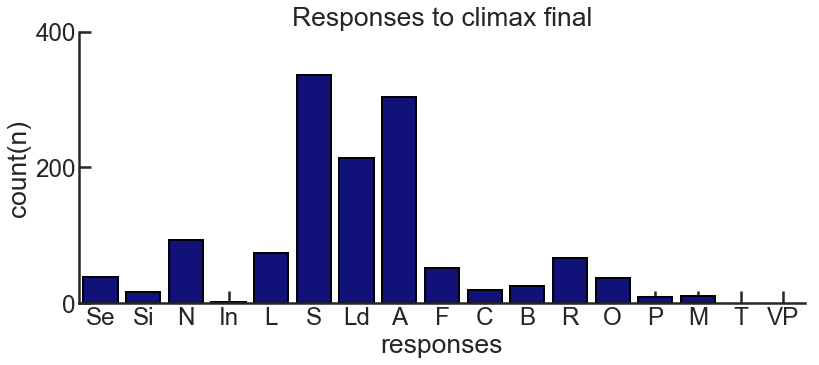

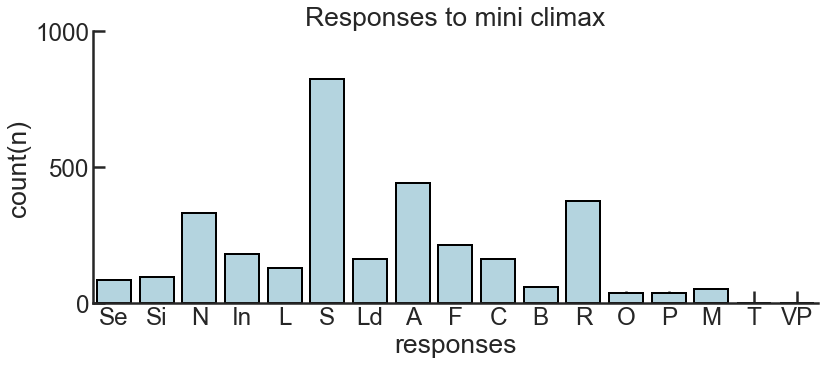

In [48]:
plt.figure(figsize=(13,5))

sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df.loc[ (df['previous_event']=='gag') ], estimator=np.sum, 
                  ci=0, color='darkorange', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,2000)
plt.gca().set_yticks([0, 1000,2000])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to gag')


##########################################
##########################################


plt.figure(figsize=(13,5))

sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df.loc[ (df['previous_event']=='Climax final') ], estimator=np.sum, 
                  ci=0, color='darkblue', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,400)
plt.gca().set_yticks([0, 200, 400])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to climax final')





##########################################
##########################################


plt.figure(figsize=(13,5))

sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df.loc[ (df['previous_event']=='Miniclimax') ], estimator=np.sum, 
                  ci=0, color='lightblue', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,1000)
plt.gca().set_yticks([0, 500, 1000])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to mini climax')

## Resclaed

In [49]:
### total count according to previous event controling for numer of events

In [50]:
##Actions Gea data
df_gea=pd.read_excel(os.getcwd() + '\\EVENTOS_GEA.xlsx', sheet_name='Hoja2' )
times_s = [df_gea.tiempo.iloc[i].minute*60 + df_gea.tiempo.iloc[i].second for i in range(len(df_gea))]
df_gea['times_s'] = times_s

### cambiar tiempo y tiempo_s por los corregidos, en los que se restan 10 minutos, 31 segundos. De esta manera, 
### los dos dataframes están sincronizados

new_times=[]
times_s_new=[]

for i in range(len(df_gea)):
    #print(i)
    h = df_gea.tiempo.iloc[i]
    h_t = str(h.hour) + ':' + str(h.minute) + ':' + str(h.second) 
    substracting = '00:10:31'
    new_time = dt.strptime(h_t, "%H:%M:%S") - dt.strptime(substracting, "%H:%M:%S")
    new_times.append(new_time)
    ##
    times_s_new.append(df_gea.times_s.loc[i] - (60*10 + 31) ) 

    
df_gea['tiempo'] = new_times 
df_gea['times_s'] = times_s_new 

df_gea = df_gea.sort_values(by=['times_s'])

df_gea= df_gea.reset_index()
df_gea = df_gea[['tiempo', 'evento', 'decripcion', 'times_s']]
df_gea['evento_'] = df_gea['evento'].copy()
df_gea['evento_'] = df_gea['evento_'].replace(['Miniclimax', 'Climax final' ], ['climax', 'climax']) #for simplicity
df_gea.head()

,tiempo,evento,decripcion,times_s,evento_
0,00:00:27,gag,broma sobre su dominio del catalán,27,gag
1,00:00:34,gag,"""Por deferencia""",34,gag
2,00:00:46,inicio,Abre el estuche de la baraja,46,inicio
3,00:01:05,gag,"""Que haya público""",65,gag
4,00:01:19,gag,"""El público de schroedinger""",79,gag


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

Text(0.5,1,'Responses to mini climax')

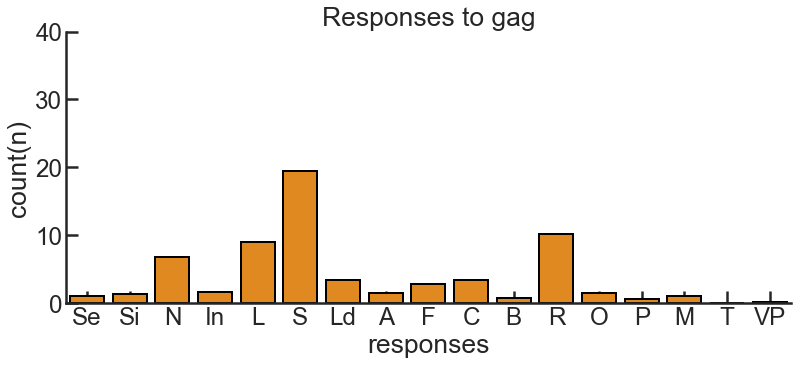

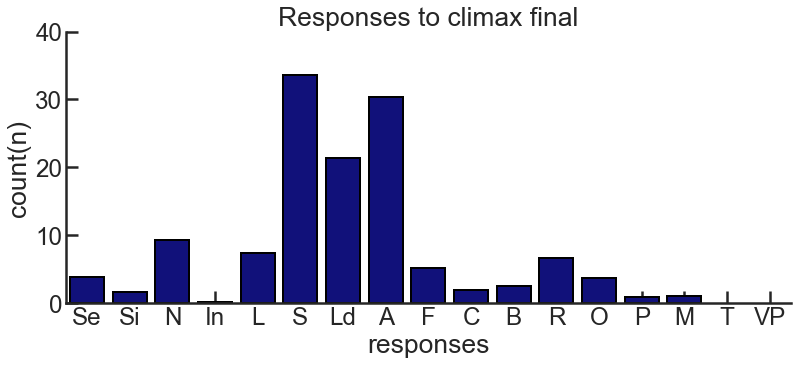

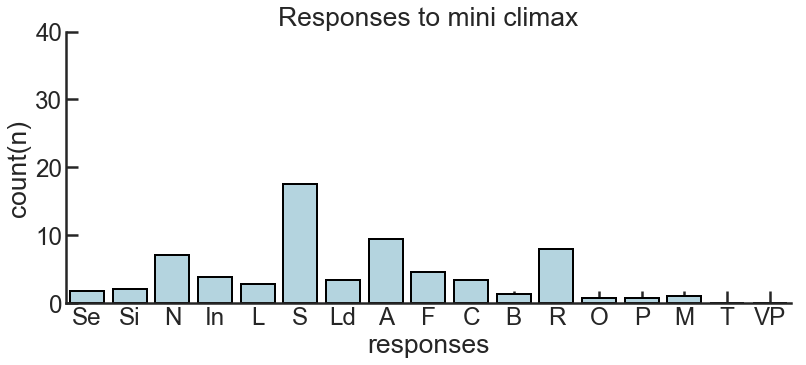

In [51]:
## correct number of events
n_total_gags = len(df_gea.loc[df_gea['evento']=='gag'])
n_total_minicl = len(df_gea.loc[df_gea['evento']=='Miniclimax'])
n_total_clfin = len(df_gea.loc[df_gea['evento']=='Climax final'])
n_events_tot = [ n_total_minicl, n_total_clfin, n_total_gags]


plt.figure(figsize=(13,5))

df_GAG = df.loc[ (df['previous_event']=='gag') ]
df_GAG['count'] = df_GAG['count'] / n_total_gags

sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df_GAG, estimator=np.sum, 
                  ci=0, color='darkorange', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.title('prev event: GAG');
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0, 1000,2000])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to gag')


##########################################
##########################################


plt.figure(figsize=(13,5))

df_CLF = df.loc[ (df['previous_event']=='Climax final') ]
df_CLF['count'] = df_CLF['count'] / n_total_clfin


sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df_CLF, estimator=np.sum, 
                  ci=0, color='darkblue', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)
# plt.gca().set_yticks([0, 200, 400])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to climax final')





##########################################
##########################################


plt.figure(figsize=(13,5))

df_MIN = df.loc[ (df['previous_event']=='Miniclimax') ]
df_MIN['count'] = df_MIN['count'] / n_total_minicl

sns.barplot(x='event2', y='count', order=df.event2.unique(),
                data=df_MIN, estimator=np.sum, 
                  ci=0, color='lightblue', edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
#plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('counts/subject')
#plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0,20,40])
plt.gca().set_xlabel('responses')
plt.gca().set_ylabel('count(n)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)
#plt.gca().set_yticks([0, 500, 1000])
plt.gca().tick_params(direction='in') #direction

plt.gca().set_title('Responses to mini climax')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'description responses')

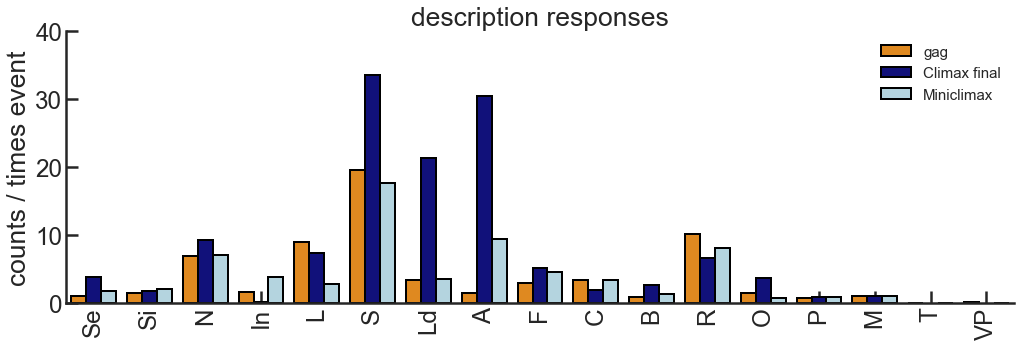

In [52]:
plt.figure(figsize=(17,5))

df_ = pd.concat([df_GAG, df_CLF, df_MIN ])

sns.barplot(x='event2', y='count', order=df.event2.unique(), hue='previous_event',
                data=df_, estimator=np.sum, hue_order=['gag', 'Climax final', 'Miniclimax'],
                  ci=0, palette=['darkorange', 'darkblue', 'lightblue'], edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.ylabel('counts / times event')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)

plt.gca().tick_params(direction='in') #direction
plt.legend(frameon=False, title='', loc=1, fontsize=15)
plt.xticks(rotation=90)

plt.title('description responses')

In [53]:
dictionary_events={}
dictionary_events['Se']=['reclinarse', 'lean back']
dictionary_events['Si']=['reclinarse', 'lean forward']
dictionary_events['N']=['barbilla', 'chin']
dictionary_events['In']=['inmóvil', 'still']
dictionary_events['L']=['público', 'audience']
dictionary_events['S']=['sonrisa', 'smile']
dictionary_events['I']=['izquierda', 'left']
dictionary_events['A']=['aplauso', 'applause']
dictionary_events['F']=['facial', 'facial']
dictionary_events['C']=['cabeza', 'head']
dictionary_events['B']=['boca', 'mouth']
dictionary_events['R']=['risa', 'laugh']
dictionary_events['O']=['otras', 'other']
dictionary_events['D']=['derecha', 'right']
dictionary_events['M']=['mago', 'magician']
dictionary_events['P']=['?', '?']
dictionary_events['T']=['?_2', '?_2']
dictionary_events['VP']=['pérdida visión', 'vision lost']

####
dictionary_events['Ld']=['lado', 'side']



In [58]:
interest_events = ['Se', 'Si', 'A', 'In', 'Ld', 'L', 'S', 'R', 'B', 'C', 'N', 'F', 'M']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'')

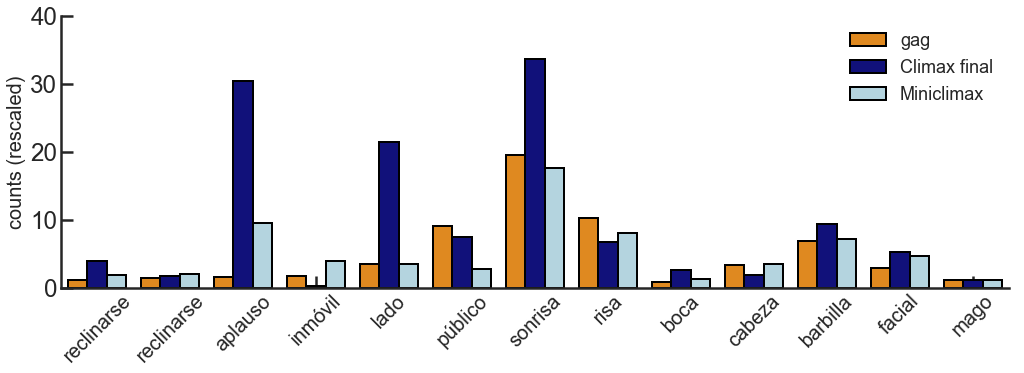

In [82]:
plt.figure(figsize=(17,5))

df_ = pd.concat([df_GAG, df_CLF, df_MIN ])

sns.barplot(x='event2', y='count', order=interest_events, hue='previous_event',
                data=df_, estimator=np.sum, hue_order=['gag', 'Climax final', 'Miniclimax'],
                  ci=0, palette=['darkorange', 'darkblue', 'lightblue'], edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.ylabel('counts (rescaled)', fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)

plt.gca().tick_params(direction='in') #direction
plt.legend(frameon=False, title='', loc=1, fontsize=18)

interest_events_esp = [dictionary_events[E][0] for E in interest_events ]
plt.xticks([i for i in range(len(interest_events))], interest_events_esp, rotation=45, fontsize=20)

plt.title('')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'')

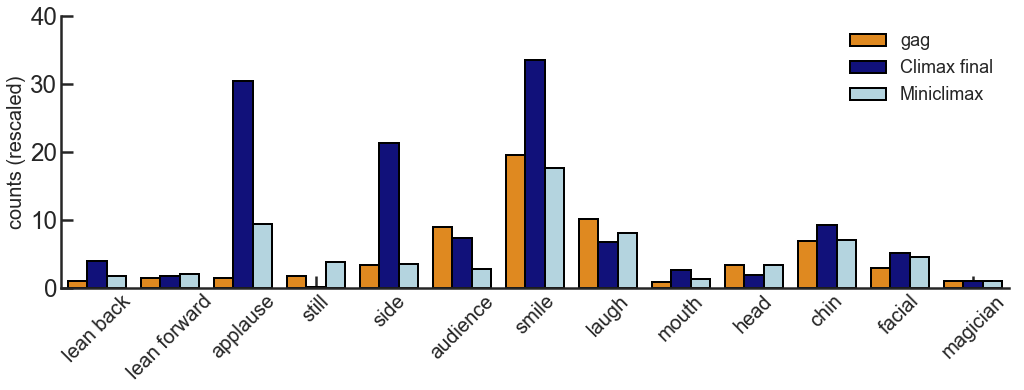

In [83]:
plt.figure(figsize=(17,5))

df_ = pd.concat([df_GAG, df_CLF, df_MIN ])

sns.barplot(x='event2', y='count', order=interest_events, hue='previous_event',
                data=df_, estimator=np.sum, hue_order=['gag', 'Climax final', 'Miniclimax'],
                  ci=0, palette=['darkorange', 'darkblue', 'lightblue'], edgecolor='black', ecolor='k', alpha=1.0)


plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.ylabel('counts (rescaled)', fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(direction='in') #direction
plt.gca().set_ylim(0,40)

plt.gca().tick_params(direction='in') #direction
plt.legend(frameon=False, title='', loc=1, fontsize=18)

interest_events_esp = [dictionary_events[E][1] for E in interest_events ]
plt.xticks([i for i in range(len(interest_events))], interest_events_esp, rotation=45, fontsize=20)

plt.title('')